<a href="https://colab.research.google.com/github/joannarashid/Air-Pollution-and-Mobility-COVID-19/blob/master/122_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Relationship Between Air Pollution and Mobility of Individuals Following COVID-19 Related “Shelter-in-Place” Orders.

Yousif Nuaimi, Anjelica Martinez, Joanna Rashid


### Introduction

The historic COVID-19 pandemic has caused nearly 50% of the world population to be subject to government “stay-at-home” orders.  This sudden, drastic reduction in the mobility of the population has generated a natural experiment that tests the effect a near halt of mobility for individuals and drastic reduction of commercial operations would have on air quality.  The metric used for this study is the mean daily mobility of individuals in a given US county. On these criteria, five major counties were selected with the greatest reduction in mobility of its citizens and five major counties with the lowest.  A major county is defined as being in the top 40 most populous counties in the US, per the US Census Bureau.  The time period of this study is February 28 through March 27, which is the time during which some US counties enacted “shelter-in-place” order to control the community spread of COVID-19.  The five counties with the greatest reduction in citizen mobility issued “shelter-in-place” orders during this period.  The five counties with the least mobility reduction had no “shelter-in-place” orders during the studied time period and can serve as a control group. The finding of this data visualization study will serve to convey the quantity of air pollution generated by the mobility individuals alone.

### Counties of Interest

Counties that decreased mobility 98-100% between Feb. 28 to Mar. 27. (Glanz, J., et al., 2020). New York Times.

* Arlington, VA
* District of Columbia, DC
* New York, NY
* San Francisco, CA
* Santa Clara, CA

Most populous counties that decreased mobility 30% or less between Feb. 28 to Mar. 27. (Glanz, J., et al., 2020). New York Times.

* Miami-Dade, FL
* Dallas, TX
* Harris, TX
* Maricopa, AZ
* San Bernardino County, CA


### Packages and Libraries

In [ ]:
install.packages("tidyverse")
install.packages("hrbrthemes")
install.packages("gridExtra")
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’, ‘extrafont’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘hexbin’, ‘data.table’




In [ ]:
library(ggplot2)
library(hrbrthemes)
library(reshape2)
library(gridExtra)
library(dplyr)
library(plotly)

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [ ]:
hrbrthemes::import_roboto_condensed()

You will likely need to install these fonts on your system as well.

You can find them in [/usr/local/lib/R/site-library/hrbrthemes/fonts/roboto-condensed]



### Data Source

In [ ]:
df <- read.csv("df.csv", stringsAsFactors = FALSE)
high_mobility <- read.csv("increase.csv", stringsAsFactors = FALSE)
low_mobility <- read.csv("decrease.csv", stringsAsFactors = FALSE)

#import again with strings as.factors FALSE


Warning message in file(file, "rt"):
“cannot open file 'df.csv': No such file or directory”


ERROR: ignored

###Data Prep for Statistics

In [ ]:
arlington <- subset(low_mobility, county == 'Arlington')
new_york <- subset(low_mobility, county == 'New York')
san_francisco <- subset(low_mobility, county == 'San Francisco')
santa_clara <- subset(low_mobility, county == 'Santa Clara')
dallas <- subset(high_mobility, county == 'Dallas')
harris <- subset(high_mobility, county == 'Harris')
maricopa <- subset(high_mobility, county == 'Maricopa')
miami_dade <- subset(high_mobility, county == 'Miami-Dade')
san_bernandino <- subset(high_mobility, county == 'San Bernandino')

df_list <- list(arlington, new_york, san_francisco, santa_clara, 
  dallas, harris, maricopa, miami_dade, san_bernandino)

In [ ]:
head(high_mobility)
head(low_mobility)

,X,date,county,m50,m50_index,aqi,main_pollutant,ozone,pm25,co,so2,pm10,no2
,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>
1,2,2020-03-01,Maricopa,5.387,62,44,Ozone,44,43,7,1,17,29
2,3,2020-03-01,Miami-Dade,5.467,68,47,Ozone,47,30,NA,NA,NA,NA
3,5,2020-03-01,San Bernardino,4.508,57,47,PM2.5,47,47,NA,NA,NA,NA
4,9,2020-03-02,Dallas,9.311,100,50,PM2.5,23,50,NA,NA,NA,NA
5,10,2020-03-02,Harris,8.717,97,48,PM2.5,37,48,NA,NA,NA,NA
6,11,2020-03-02,Maricopa,8.438,97,41,Ozone,41,26,5,1,19,24


,X,date,county,m50,m50_index,aqi,main_pollutant,ozone,pm25,co,so2,pm10,no2
,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<lgl>,<fct>,<lgl>
1,1,2020-03-01,Arlington,3.270,71,37,Ozone,37,.,NA,NA,NA,NA
2,4,2020-03-01,New York,0.462,23,35,Ozone,35,.,2,NA,.,NA
3,6,2020-03-01,San Francisco,2.663,77,36,Ozone,36,20,NA,NA,NA,NA
4,7,2020-03-01,Santa Clara,4.088,57,36,Ozone,36,29,NA,NA,NA,NA
5,8,2020-03-02,Arlington,4.594,100,44,Ozone,44,.,NA,NA,NA,NA
6,13,2020-03-02,New York,1.896,96,31,Ozone,31,.,.,NA,.,NA


In [ ]:
time_series <- function(value)
{
  high <- ggplot(high_mobility, aes(date,value)) + 
  geom_point() +
  facet_wrap(~county, scales = "fixed", ncol=1) +
  theme_ipsum()

  low <- ggplot(low_mobility, aes(date,value)) + 
  geom_point() +
  facet_wrap(~county, scales = "fixed", ncol=1) +
  theme_ipsum()

grid.arrange(arrangeGrob(high, low))
}

### Mobility Time Series

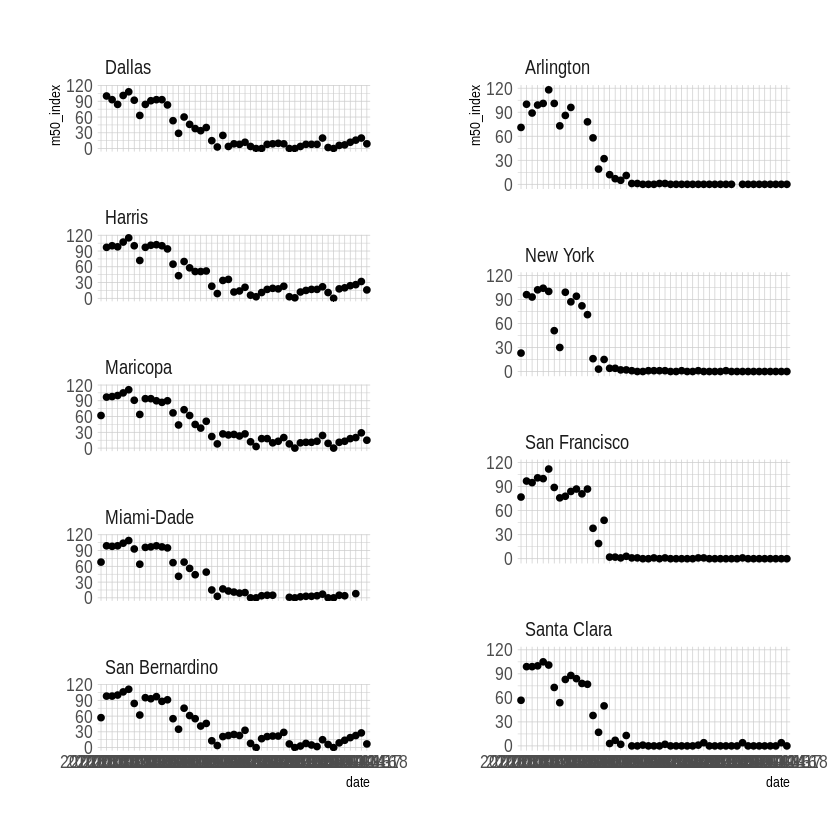

In [ ]:
mobility_time_high <- ggplot(high_mobility, aes(date,m50_index)) + 
  geom_point() +
  facet_wrap(~county, ncol=1, scales = "fixed") +
  theme_ipsum()

mobilty_time_low <- ggplot(low_mobility, aes(date,m50_index)) + 
  geom_point() +
  facet_wrap(~county, ncol=1, scales = "fixed") +
  theme_ipsum()

grid.arrange(mobility_time_high, mobilty_time_low, ncol=2)

### Air Quality Time Series

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



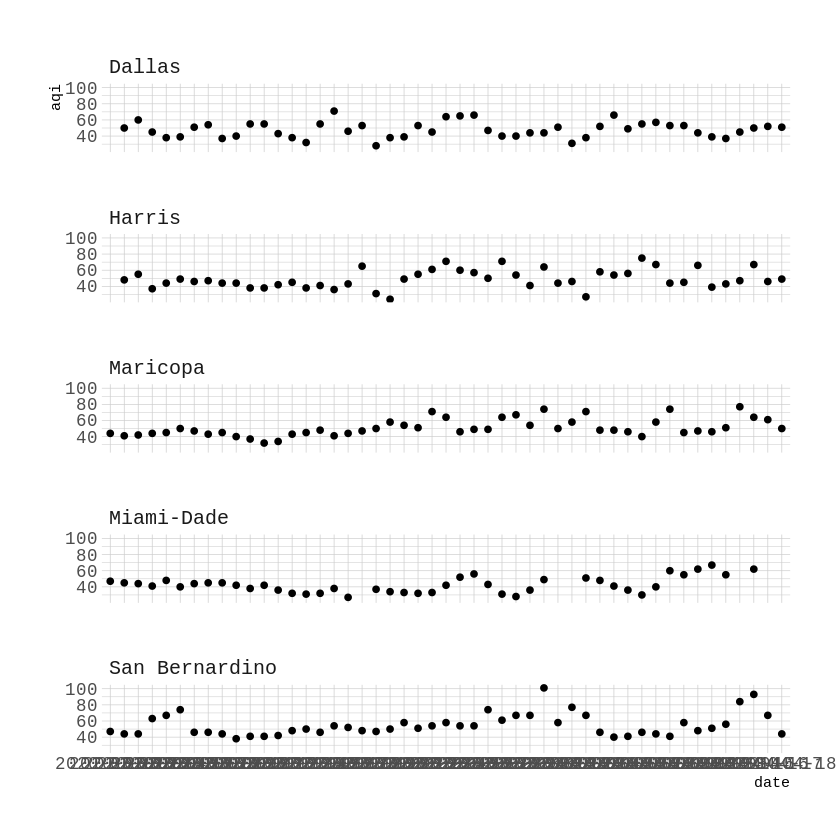

In [ ]:
high_aqi <- ggplot(high_mobility,aes( x=date , y=aqi )) + 
  geom_point() +
  geom_smooth () + #not showing this line for some reason
  facet_wrap(~county, ncol = 1) +
  theme_ipsum_pub()
high_aqi

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



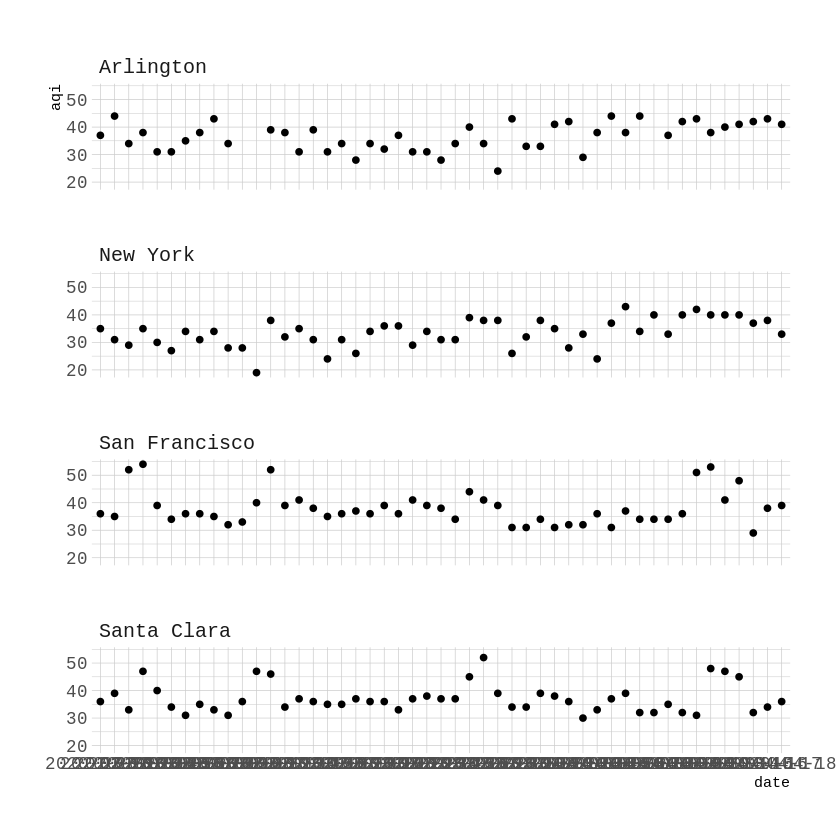

In [ ]:
low_aqi <- ggplot(low_mobility, aes( x=date , y=aqi )) + 
  geom_point() +
  geom_smooth()+
  facet_wrap(~county, ncol= 1) +
  theme_ipsum_pub()

low_aqi

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



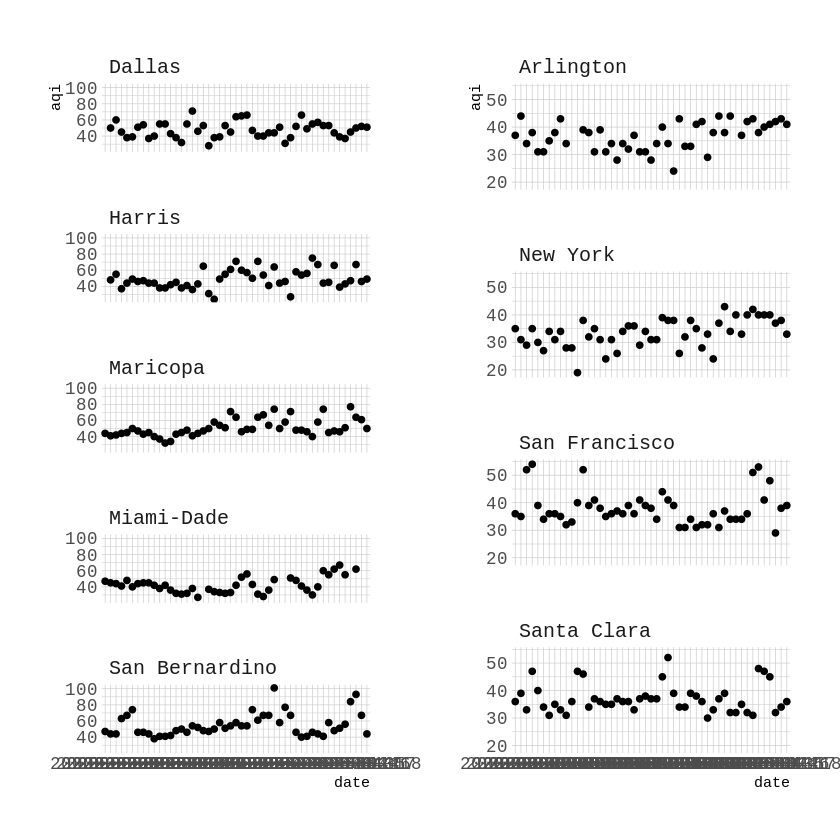

In [ ]:
low_aqi <- ggplot(low_mobility,aes( x=date , y=aqi )) + 
  geom_point() +
  geom_smooth()+
  facet_wrap(~county, ncol= 1) +
  theme_ipsum_pub()

high_aqi <- ggplot(high_mobility,aes( x=date , y=aqi )) + 
  geom_point() +
  geom_smooth()+
  facet_wrap(~county, ncol = 1) +
  theme_ipsum_pub()

grid.arrange(high_aqi, low_aqi, ncol=2)

### Ozone Time Series

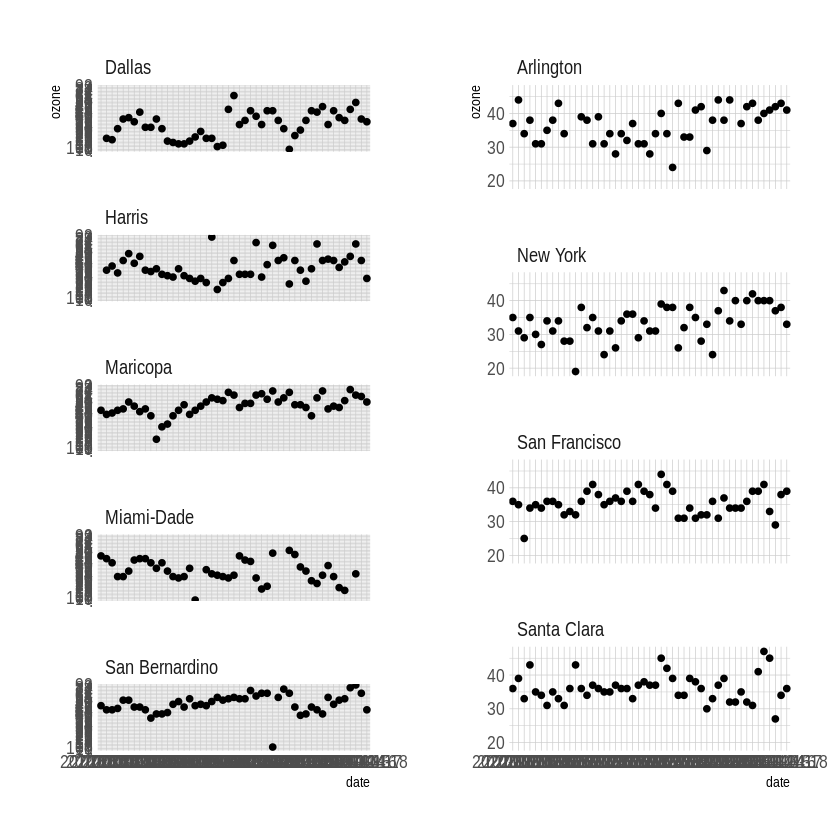

In [ ]:
ozone_time_high <- ggplot(high_mobility, aes(date,ozone)) + 
  geom_point() +
  facet_wrap(~county, ncol=1) +
  theme_ipsum()

ozone_time_low <- ggplot(low_mobility, aes(date,ozone)) + 
  geom_point() +
  facet_wrap(~county, ncol=1) +
  theme_ipsum()

grid.arrange(ozone_time_high, ozone_time_low, ncol=2)

### Mobility vs. Air Quality

Simple plot with best fit line - mobility vs. aqi for all counties

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



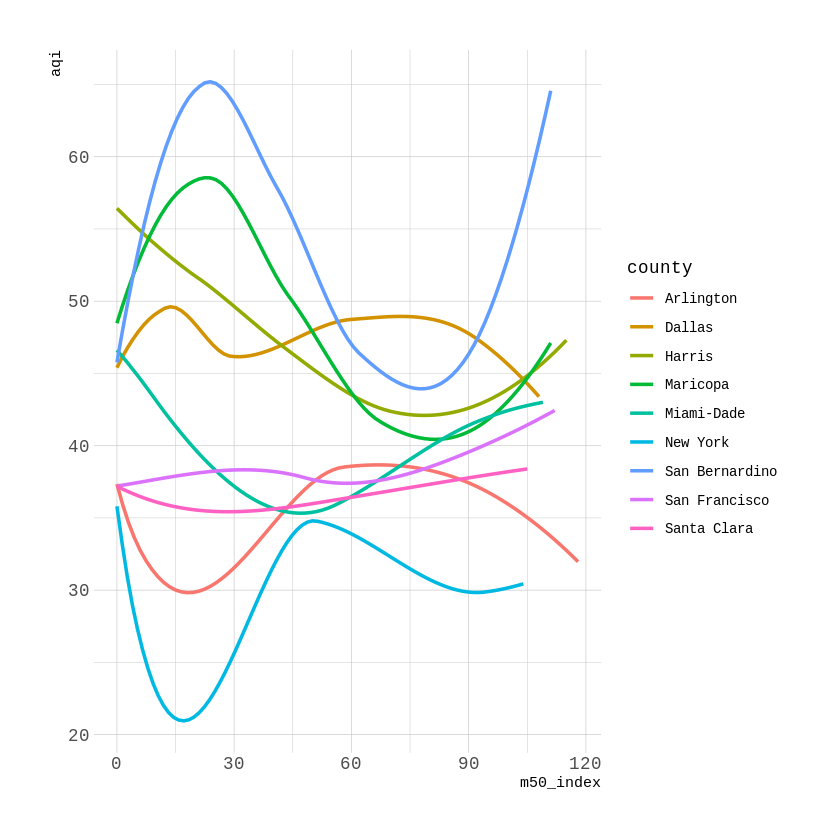

In [ ]:
ggplot(df,aes(x=m50_index, y=aqi ,color=county, group=county)) + 
  geom_smooth(se=FALSE) +
  theme_ipsum_pub()

Scatter plot and linear model- mobility vs. aqi for all counties

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



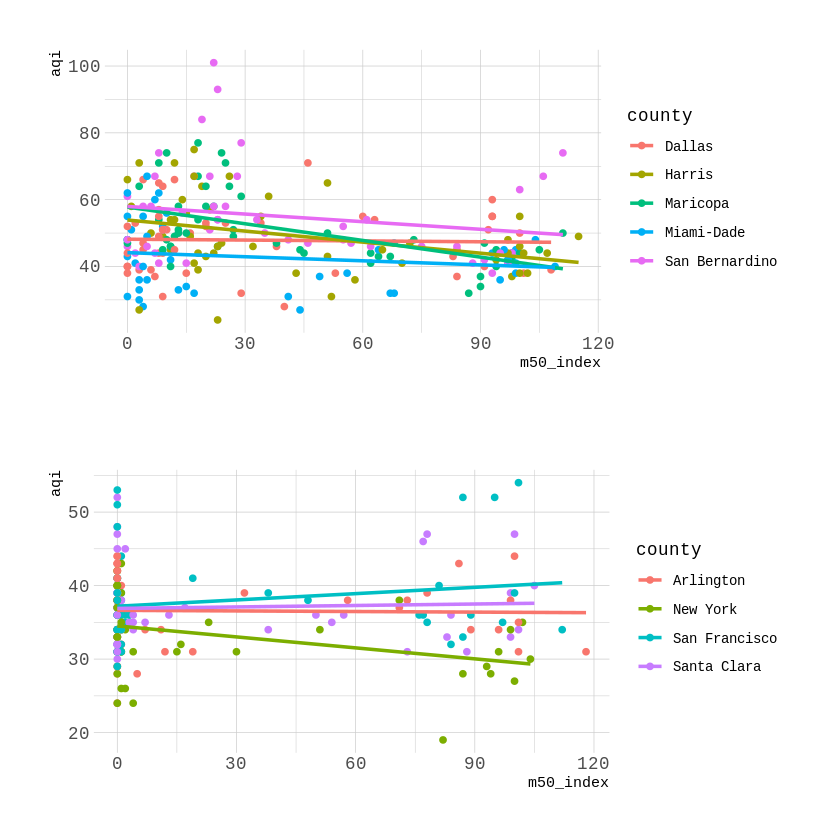

In [ ]:
high_mob_aqi <- ggplot(high_mobility,aes( x=m50_index , y=aqi , color=county , group=county )) + 
  geom_point() +
  geom_smooth ( method=lm , se=FALSE) +
  theme_ipsum_pub()

low_mob_aqi <- ggplot(low_mobility,aes( x=m50_index , y=aqi , color=county , group=county )) + 
  geom_point() +
  geom_smooth ( method=lm , se=FALSE) +
  theme_ipsum_pub()

grid.arrange(high_mob_aqi, low_mob_aqi)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



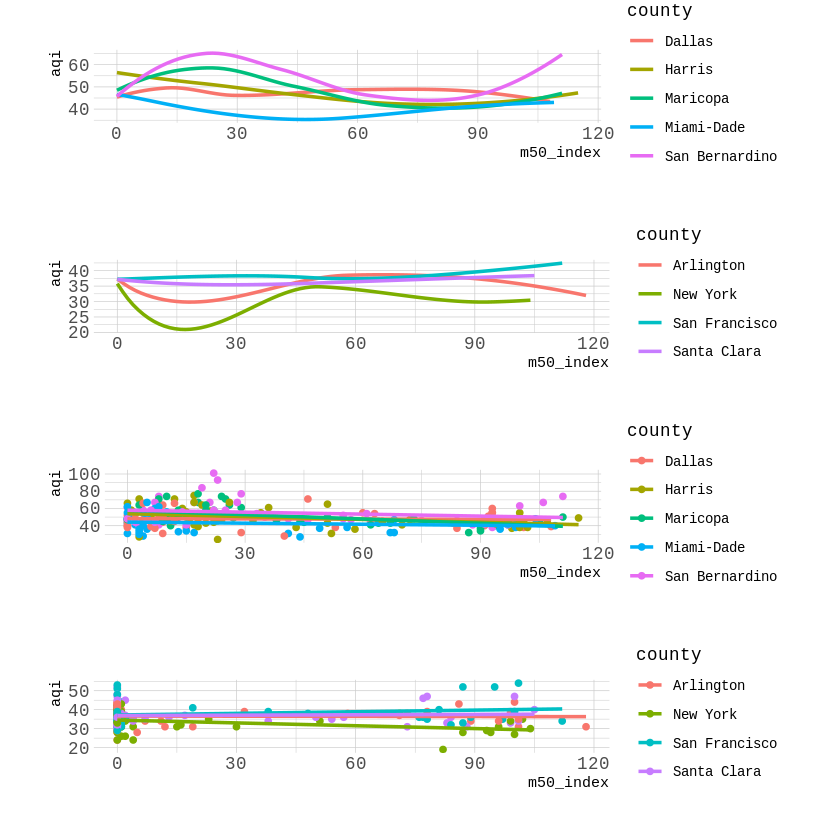

In [ ]:
high_mob_smooth <- ggplot(high_mobility,aes( x=m50_index , y=aqi , color=county , group=county )) + 
  geom_smooth (se=FALSE) +
  theme_ipsum_pub()

low_mob_smooth <- ggplot(low_mobility,aes( x=m50_index , y=aqi , color=county , group=county )) + 
  geom_smooth (se=FALSE) +
  theme_ipsum_pub()

high_mob_lm <- ggplot(high_mobility,aes( x=m50_index , y=aqi , color=county , group=county )) + 
  geom_point() +
  geom_smooth ( method=lm , se=FALSE) +
  theme_ipsum_pub()

low_mob_lm <- ggplot(low_mobility,aes( x=m50_index , y=aqi , color=county , group=county )) + 
  geom_point() +
  geom_smooth ( method=lm , se=FALSE) +
  theme_ipsum_pub()

grid.arrange(arrangeGrob(high_mob_smooth, low_mob_smooth, high_mob_lm, low_mob_lm,
  widths = 3,
  ncol=1))

aqi vs. mobility for all counties seperately

`geom_smooth()` using formula 'y ~ x'



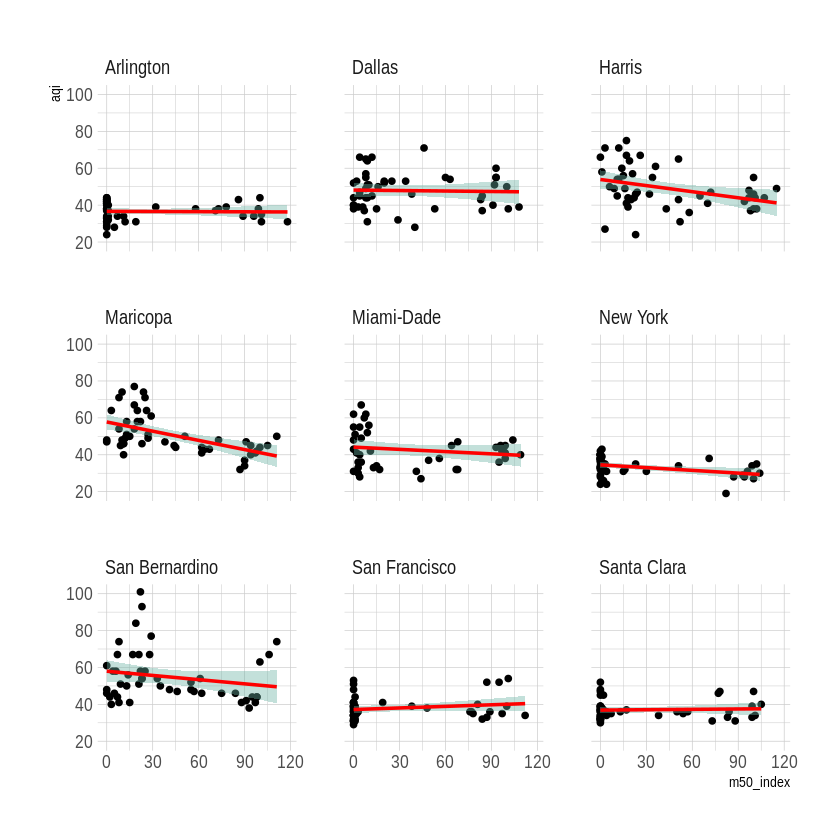

In [ ]:
aqi_mob_all <- ggplot(df, aes(m50_index,aqi)) + 
  geom_point() +
  geom_smooth (method=lm , color="red", fill="#69b3a2", se=TRUE) +
  facet_wrap(~county, ncol=3) +
  theme_ipsum()

aqi_mob_all

### Statistics New York

A preiminary look at the data tells us that New York had perhaps the greatest reduction in mobility of its citizens as well as the greatest correlation between mobility and air quality.  We'll start with examining effect of mobility on air quality in new york following that city's shelter in place order.

It is important to evaluate the relationship between pollution and mobility for each city separately since their relative pollution levels will vary greatly.

In [ ]:
run_stats <- function(df, dependent, independent){
  model <- lm(dependent ~ independent , data = df)
  print(summary(model))
}

In [ ]:
run_stats(new_york, new_york$aqi, new_york$m50_index)


Call:
lm(formula = dependent ~ independent, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4300  -2.5113   0.5385   3.4887   8.5385 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.51125    0.81088  42.560   <2e-16 ***
independent -0.04977    0.01875  -2.654   0.0108 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.874 on 47 degrees of freedom
Multiple R-squared:  0.1303,	Adjusted R-squared:  0.1118 
F-statistic: 7.044 on 1 and 47 DF,  p-value: 0.01082



In New York, there is a -.36 correlation coefficient on mobility on air quality.  Our hypothesis is that there would be a postive coeffiecient.  So while .36 does not indciate a particluarly strong relationship, the sign is the opposite of the hypothesiszed relationship.

If we create a linear model for this relationship, we see that while the finding is statistically significant,  the low R value indicates that mobility explains very little of the variability on airquality.

###Other pollutants (work in progress)

`geom_smooth()` using formula 'y ~ x'

Warning message in qt((1 - level)/2, df):
“NaNs produced”
Warning message in qt((1 - level)/2, df):
“NaNs produced”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


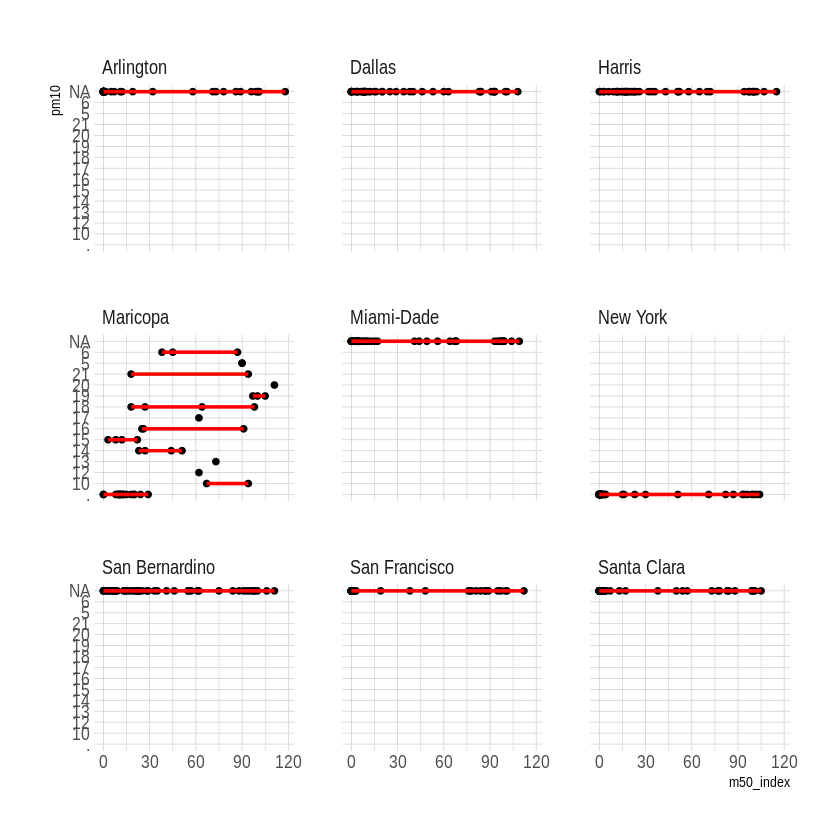

In [ ]:
pm10 <- ggplot(df, aes(m50_index,pm10)) + 
  geom_point() +
  geom_smooth (method=lm , color="red", fill="#69b3a2", se=TRUE) +
  facet_wrap(~county, ncol=3) +
  theme_ipsum()

pm10

##Conclusion

The COVID-19 crisis has resulted in extensive "shelter-in-place" orders worldwide.  Much has been made of the resulting reduction in air pollution.  This project sought to find the degree to which the dramatically reduced mobility of individuals in 10 major US cities could be correlated with the reduction in pollution.  We hypothesized that there would be a statistically significant relationship, however, even for the cites that reduce mobility the most the correlation between mobility and pollution was weak.  This suggests the the global reduction in polltion currently being observed is caused by factors other than the mobility of individuals.  Such factors are likely related to significantly decreased idustrial activity.  Though our hypothesis was not proved, this data still provides an important take-away: Reducing individual commuting and transportation will not be sufficient to combat air pollution.  Our findings highlight the importantance of focusing on industrial pollution rather than reforming the pollution emissions of individual.

In [ ]:
 # for saving images later
aspect_ratio <- 2.5
height <- 5
ggsave(g, height = 5 , width = 10 * aspect_ratio)

ERROR: ignored